In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tables import create_connection

rcParams.update({'figure.autolayout': True})

database = "spotify.db"

# create a database connection
conn = create_connection(database)


/Users/yesenia/projects/personal_projects/onramp_project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


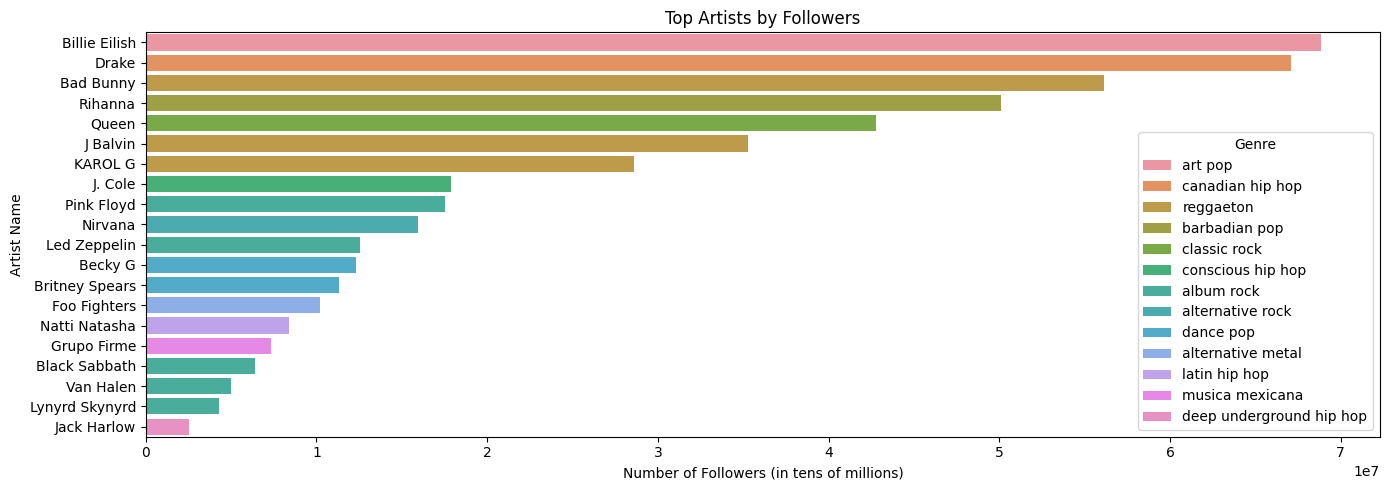

In [14]:
df = pd.read_sql_query("SELECT * FROM top_20_artists_by_followers", conn)
plt.figure(figsize=(14,5))
ax = sns.barplot(df, y='artist_name', x="followers", hue="genre", dodge=False)
ax.set_title("Top Artists by Followers")
ax.set_ylabel("Artist Name")
ax.set_xlabel("Number of Followers (in tens of millions)")
plt.legend(title="Genre")
plt.show()

/Users/yesenia/projects/personal_projects/onramp_project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


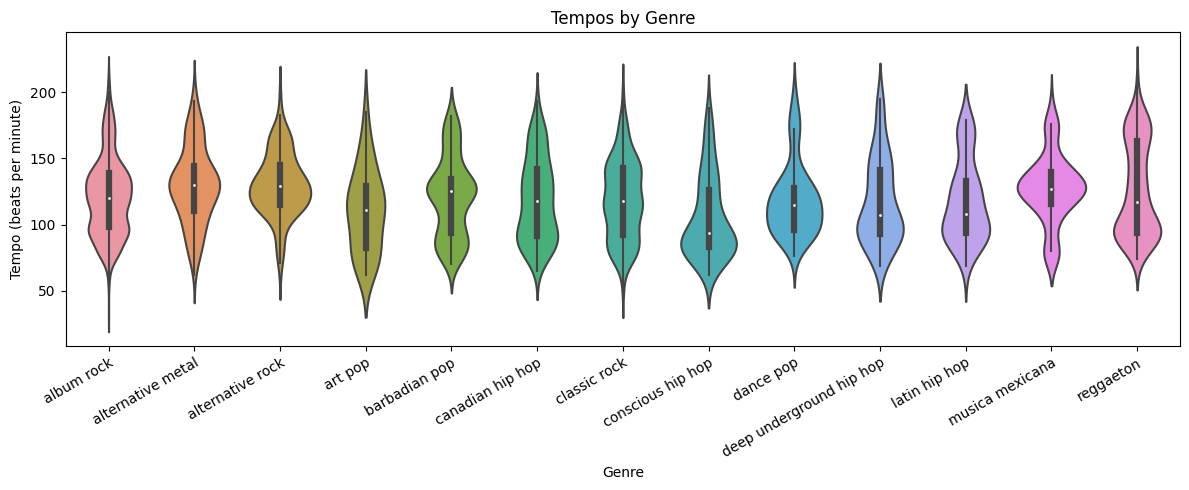

In [23]:
df = pd.read_sql_query("SELECT * FROM tempos_by_genre;", conn)
plt.figure(figsize=(12,5))
g = sns.violinplot(x='genre', y='tempo', data=df)
g.set(xlabel='Genre', ylabel='Tempo (beats per minute)', title='Tempos by Genre')
plt.xticks(rotation = 30, rotation_mode='anchor', ha='right')
plt.show()

/Users/yesenia/projects/personal_projects/onramp_project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


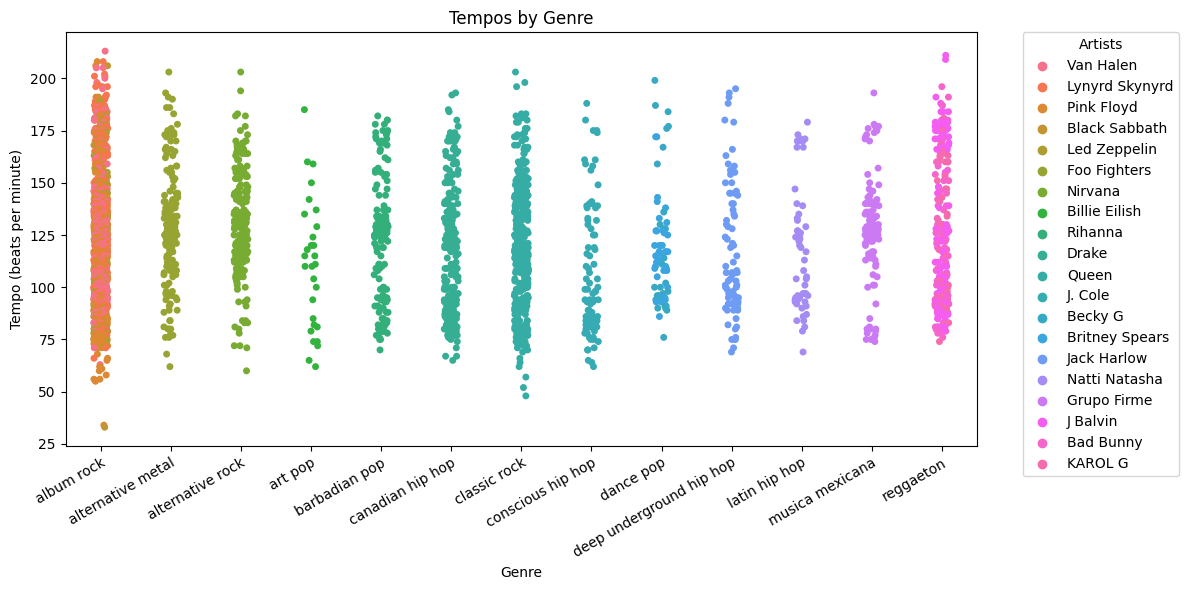

In [24]:
# def tempos_by_genre_strip_vis(conn):
df = pd.read_sql_query("SELECT * FROM tempos_by_genre;", conn)
plt.figure(figsize=(12,6))
g = sns.stripplot(x='genre', y='tempo', hue='artist_name', data=df)
g.set(xlabel='Genre', ylabel='Tempo (beats per minute)', title='Tempos by Genre')
plt.xticks(rotation = 30, rotation_mode='anchor', ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Artists")
plt.show()

/Users/yesenia/projects/personal_projects/onramp_project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


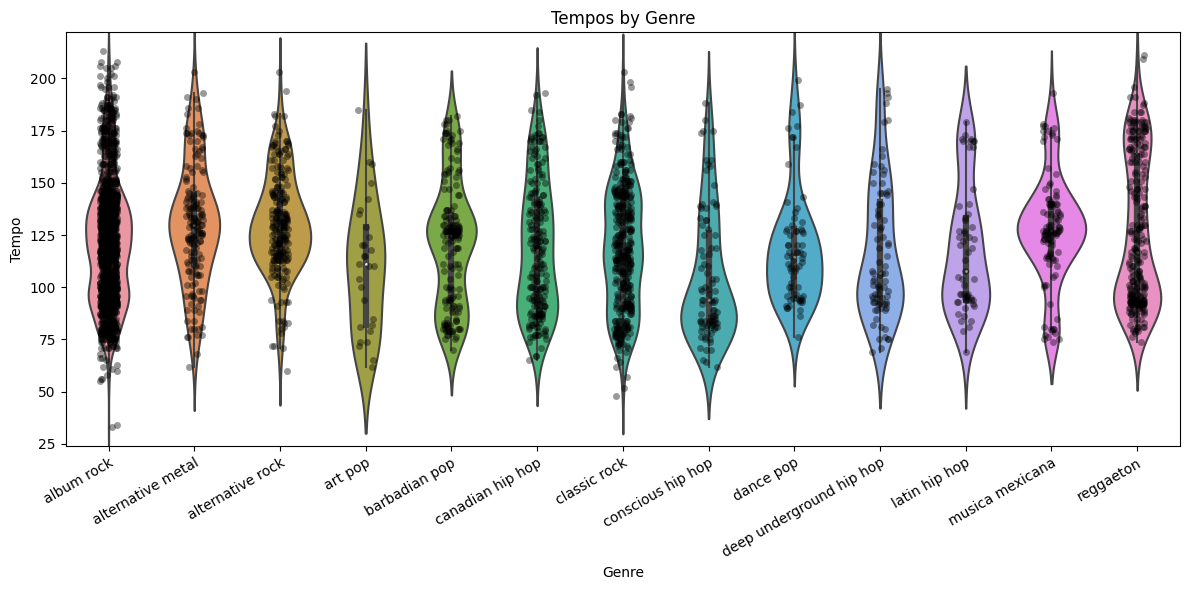

In [17]:
# def tempos_by_genre_overlay_vis(conn):
df = pd.read_sql_query("SELECT * FROM tempos_by_genre;", conn)
plt.figure(figsize=(12,6))
sns.violinplot(x='genre', y='tempo', data=df)
g = sns.stripplot(x='genre', y='tempo', data=df, color='k', alpha=0.4)
g.set(xlabel='Genre', ylabel='Tempo', title='Tempos by Genre')
plt.xticks(rotation = 30, rotation_mode='anchor', ha='right')
plt.show()

/Users/yesenia/projects/personal_projects/onramp_project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


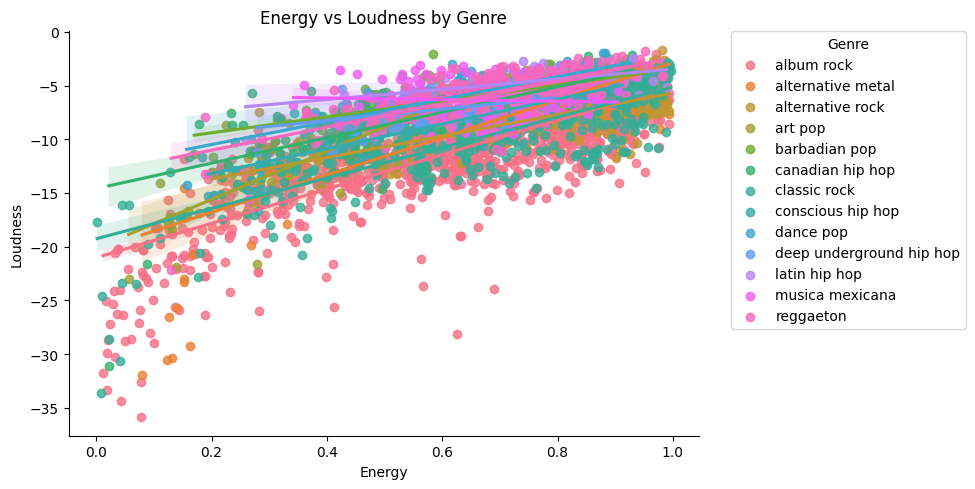

In [18]:
# def loudness_energy_by_genre_vis(conn):
df = pd.read_sql_query("SELECT * FROM loudness_energy_by_genre", conn)
g = sns.lmplot(x='energy', y='loudness', data=df, hue="genre", legend=False, aspect=2,)
g.set(xlabel='Energy', ylabel='Loudness', title='Energy vs Loudness by Genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Genre")
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, canadian hip hop to album rock
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        13 non-null     float64
 1   danceability      13 non-null     float64
 2   energy            13 non-null     float64
 3   instrumentalness  13 non-null     float64
 4   liveness          13 non-null     float64
 5   loudness          13 non-null     float64
 6   speechiness       13 non-null     float64
 7   tempo             13 non-null     float64
 8   valence           13 non-null     float64
dtypes: float64(9)
memory usage: 1.0+ KB
                   popularity  danceability  energy  instrumentalness  \
genre                                                                   
canadian hip hop         95.0         0.660   0.556             0.016   
reggaeton                91.7         0.741   0.696             0.009   
art pop                  88.0 

/Users/yesenia/projects/personal_projects/onramp_project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


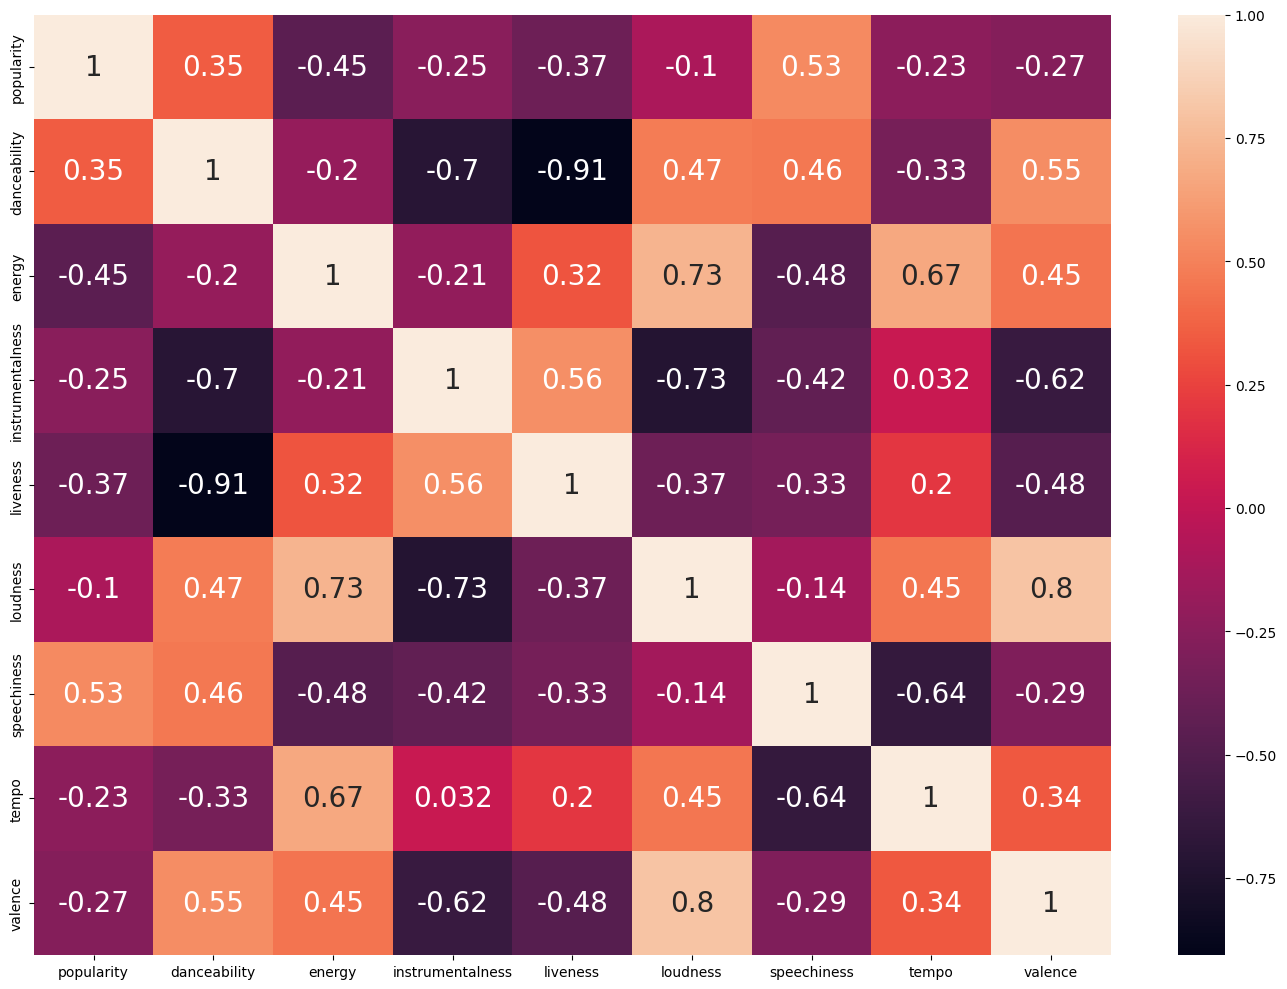

In [19]:
# def heatmap(conn):
ds = pd.read_sql_query("SELECT * FROM avg_audio_features_by_genre", conn)
# ds.head()
ds.set_index('genre', inplace=True)
ds = ds.astype("float64")
ds.info()
print(ds.head())

plt.figure(figsize=(14,10))


# pc = ds[['energy','danceability', 'popularity']].corr(method ='pearson')
pc = ds.corr(method ='pearson')

# # cols = ['energy','danceability', 'tempo']
# # y = ['popularity']

ax = sns.heatmap(pc, annot=True,
                annot_kws={'size': 20})

plt.show()

                # yticklabels=y,
                # xticklabels=cols,

/Users/yesenia/projects/personal_projects/onramp_project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


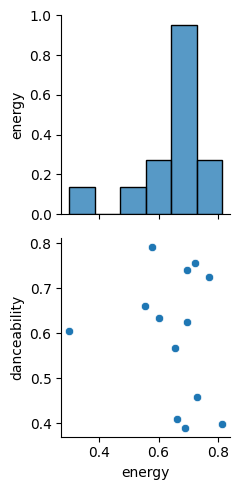

In [20]:
# ds = pd.read_sql_query("SELECT * FROM avg_audio_features_by_genre", conn)
# ['energy','danceability', 'popularity']
sns.pairplot(ds, x_vars=['energy'], y_vars=['energy', 'danceability'])
# print(ds.index())
# sns.pairplot(ds.loc['reggaeton'])
plt.show()


In [21]:
print(ds.index)

Index(['canadian hip hop', 'reggaeton', 'art pop', 'barbadian pop',
       'conscious hip hop', 'classic rock', 'deep underground hip hop',
       'musica mexicana', 'alternative rock', 'dance pop', 'alternative metal',
       'latin hip hop', 'album rock'],
      dtype='object', name='genre')


/Users/yesenia/projects/personal_projects/onramp_project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


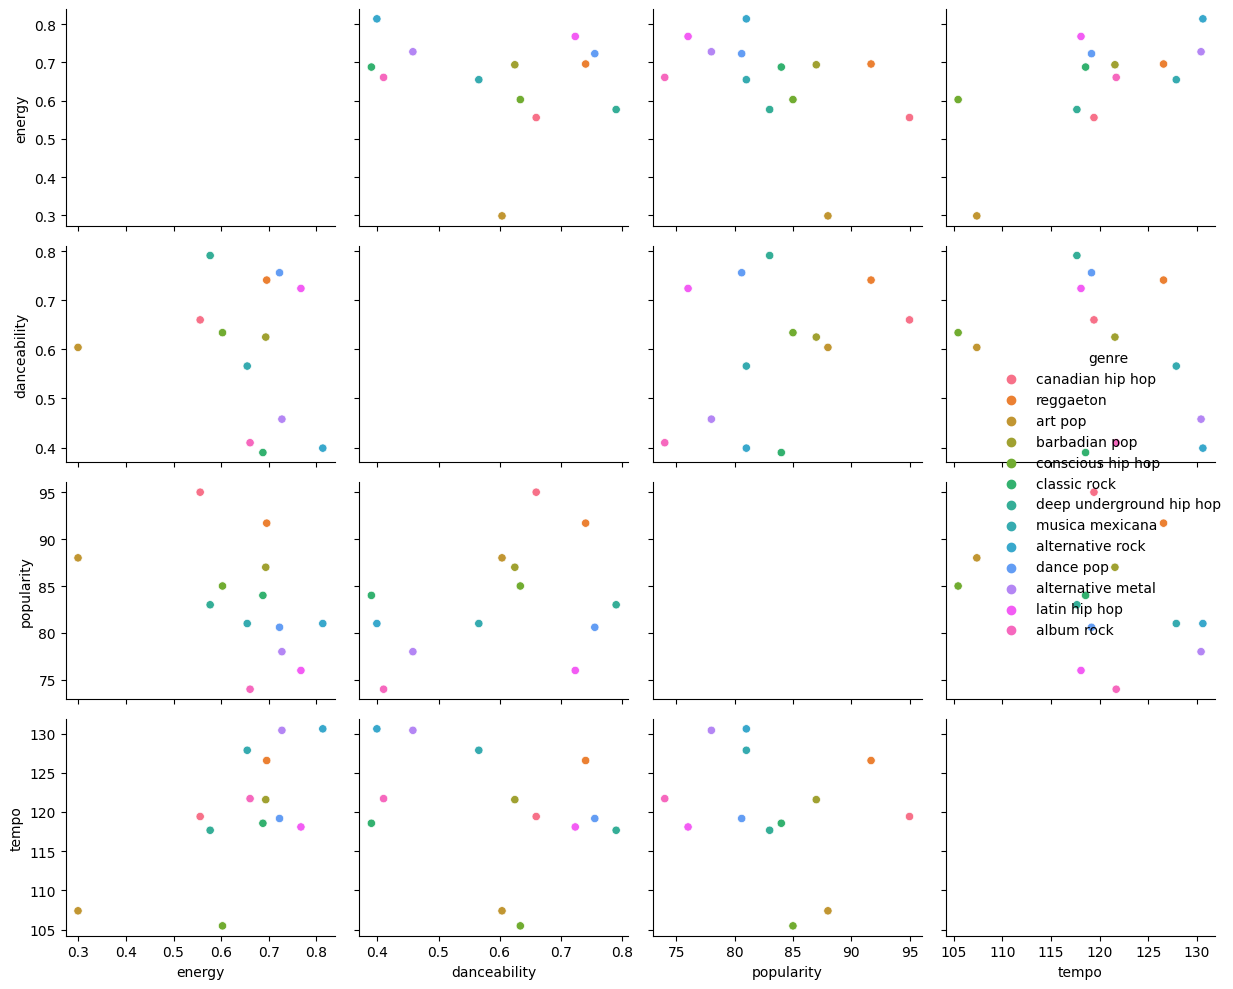

In [22]:
ds = pd.read_sql_query("SELECT * FROM avg_audio_features_by_genre", conn)
# ds.head()

type_dic = {
    "energy": "float64",
    "danceability": "float64",
    "popularity": "float64",
    "tempo": "float64"
}
ds = ds.astype(type_dic)


sns.pairplot(ds, x_vars=['energy', 'danceability', 'popularity', 'tempo'], y_vars=['energy', 'danceability', 'popularity', 'tempo'], hue="genre")
# print(ds.index())
# sns.pairplot(ds.loc['reggaeton'])
plt.savefig("pairplot", ) 
# save to your computer ^
plt.show()


# ds2 = ds.loc[(ds["genre"] == "reggaeton")]
# sns.pairplot(ds2)

/Users/yesenia/projects/personal_projects/onramp_project/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


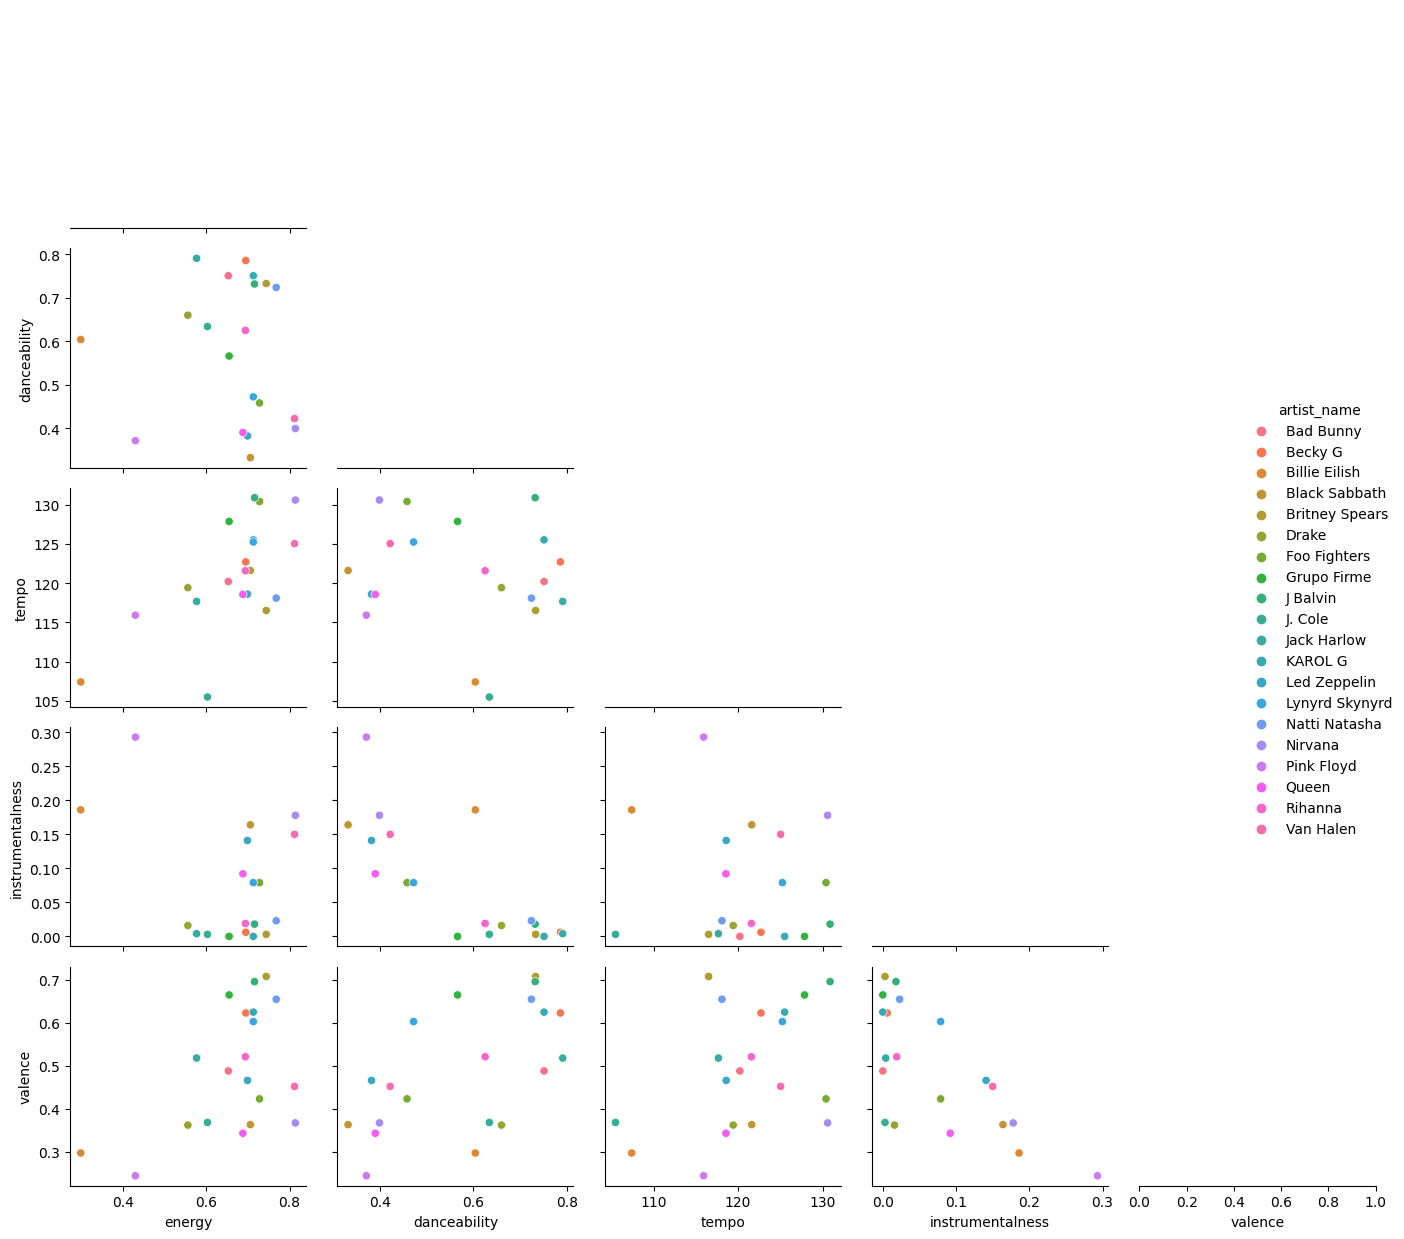

In [28]:
ds = pd.read_sql_query("SELECT * FROM avg_audio_features_by_artist", conn)
# ds.head()

type_dic = {
    "energy": "float64",
    "danceability": "float64",
    "tempo": "float64",
    "instrumentalness": "float64",
    "valence": "float64"
}
ds = ds.astype(type_dic)


sns.pairplot(ds, x_vars=["energy", "danceability", "tempo", "instrumentalness", "valence"], y_vars=["energy", "danceability", "tempo", "instrumentalness", "valence"], hue="artist_name", corner=True)
# print(ds.index())
# sns.pairplot(ds.loc['reggaeton'])
plt.savefig("pairplot", ) 
# save to your computer ^
plt.show()


# ds2 = ds.loc[(ds["genre"] == "reggaeton")]
# sns.pairplot(ds2)